Lasso Regression and Hyperparameter tuning using sklearn

https://medium.com/mlearning-ai/lasso-regression-and-hyperparameter-tuning-using-sklearn-885c78a37a70

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/body_fat_data.csv')
df.head()

,Unnamed: 0,Percent body fat using Siri equation 495/Density,Density gm/cm^3,Age,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Extended biceps circumference (cm),Forearm circumference (cm),Wrist circumference (cm)
0,0,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,2,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,3,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,4,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
df.shape

(252, 18)

In [4]:
df.describe()

,Unnamed: 0,Percent body fat using Siri equation 495/Density,Density gm/cm^3,Age,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Extended biceps circumference (cm),Forearm circumference (cm),Wrist circumference (cm)
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,19.150794,1.055574,44.884921,178.924405,70.148810,25.436905,143.713889,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,72.890329,8.368740,0.019031,12.602040,29.389160,3.662856,3.648111,18.231642,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,105.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,62.750000,12.475000,1.041400,35.750000,159.000000,68.250000,23.100000,131.350000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,125.500000,19.200000,1.054900,43.000000,176.500000,70.000000,25.050000,141.550000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,188.250000,25.300000,1.070400,54.000000,197.000000,72.250000,27.325000,153.875000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,251.000000,47.500000,1.108900,81.000000,363.150000,77.750000,48.900000,240.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       252 non-null    int64  
 1   Percent body fat using Siri equation 495/Density                                 252 non-null    float64
 2   Density gm/cm^3                                                                  252 non-null    float64
 3   Age                                                                              252 non-null    int64  
 4   Weight (lbs)                                                                     252 non-null    float64
 5   Height (inches)                                                                  252 non-null    float64
 6   Adiposity 

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,Percent body fat using Siri equation 495/Density,Density gm/cm^3,Age,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Extended biceps circumference (cm),Forearm circumference (cm),Wrist circumference (cm)
0,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


In [7]:
df.columns

Index(['Percent body fat using Siri equation 495/Density', 'Density gm/cm^3',
       'Age', 'Weight (lbs)', 'Height (inches)',
       'Adiposity index = Weight/Height^2 (kg/m^2)',
       'Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)',
       'Neck circumference (cm)', 'Chest circumference (cm)',
       'Abdomen circumference (cm)', 'Hip circumference (cm)',
       'Thigh circumference (cm)', 'Knee circumference (cm)',
       'Ankle circumference (cm)', 'Extended biceps circumference (cm)',
       'Forearm circumference (cm)', 'Wrist circumference (cm)'],
      dtype='object')

In [8]:
X = df.drop('Percent body fat using Siri equation 495/Density', axis=1)
y = df['Percent body fat using Siri equation 495/Density']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
numerical_feat = df.columns[1:].to_list()

In [11]:
target = df.columns[0]

In [12]:
relevant_data = df # df.drop(['id'], axis=1)
relevant_data.drop_duplicates(inplace=True)

In [13]:
type(target
    )

str

In [14]:
df.shape, relevant_data.shape

((252, 17), (252, 17))

In [15]:
X = relevant_data.drop([target], axis=1)
y = relevant_data[target]
X.shape, y.shape

((252, 16), (252,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)
X_train.shape[0] / len(relevant_data), X_test.shape[0] / len(relevant_data), set(X_train.index) & set(X_test.index)

(0.7976190476190477, 0.20238095238095238, set())

In [17]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.shape, test_data.shape

((201, 17), (51, 17))

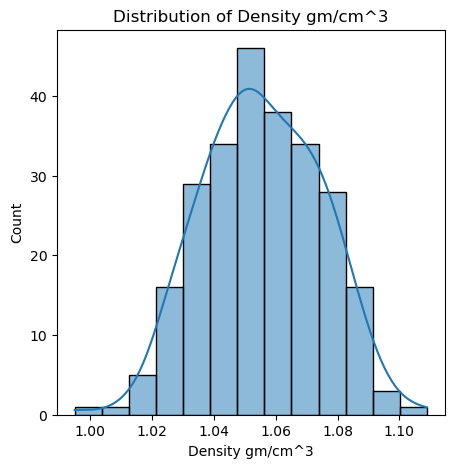

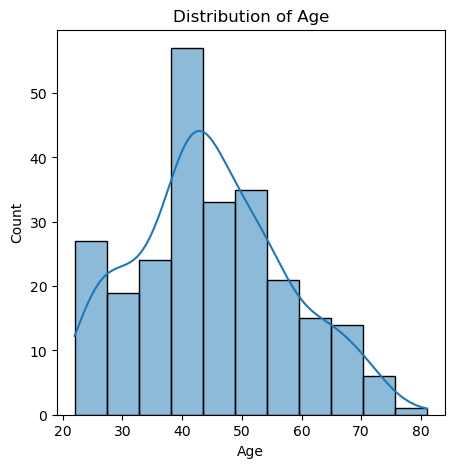

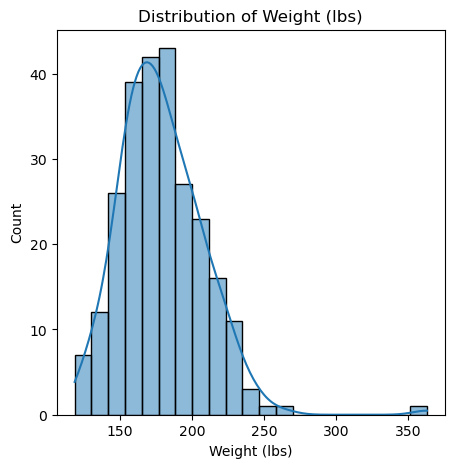

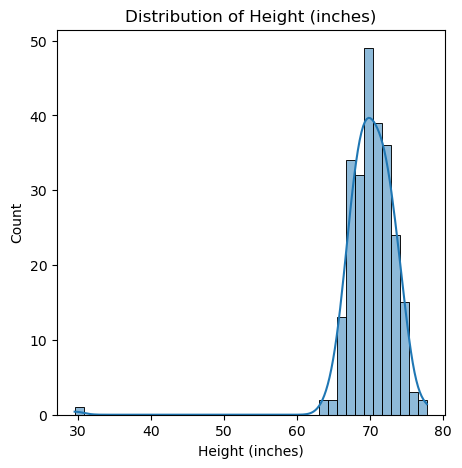

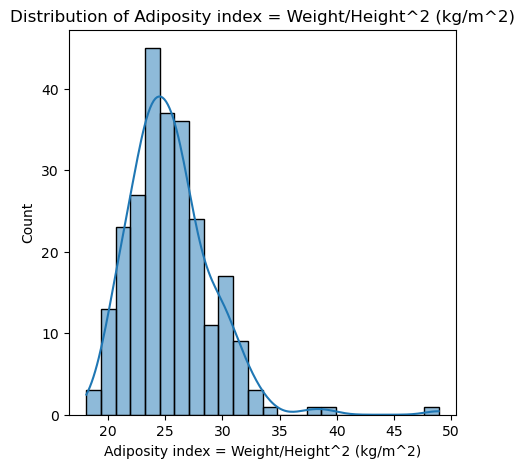

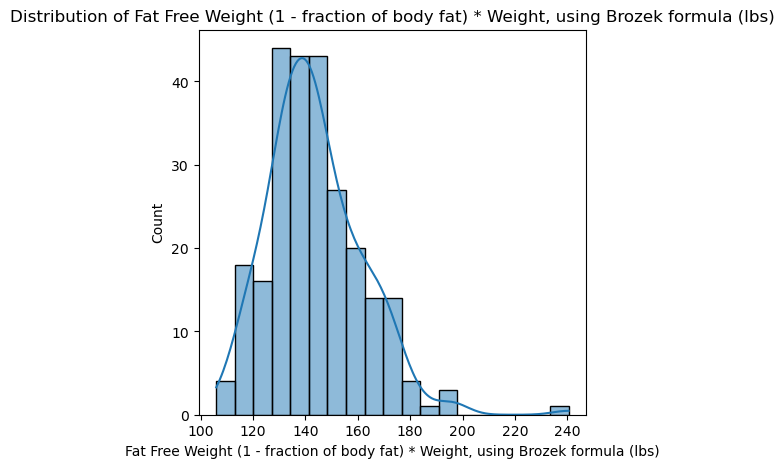

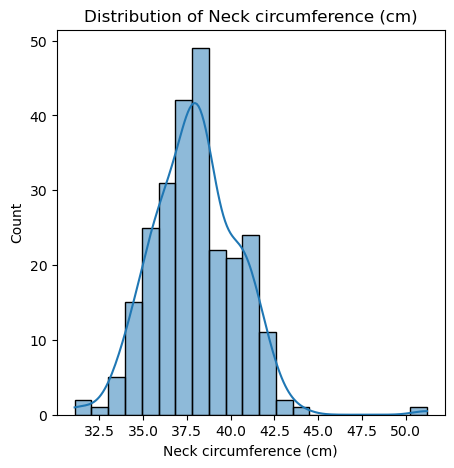

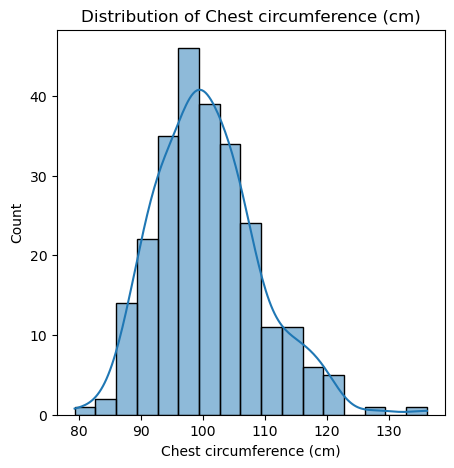

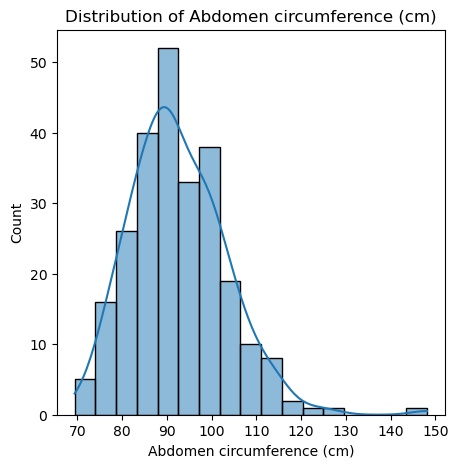

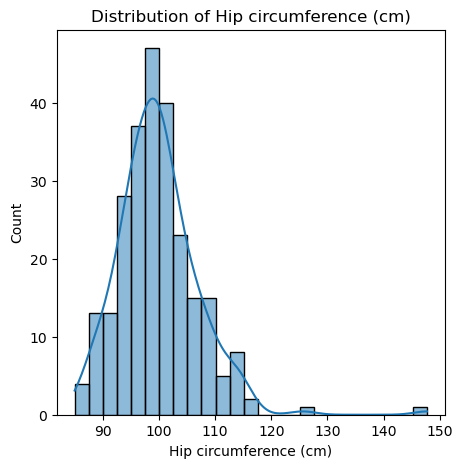

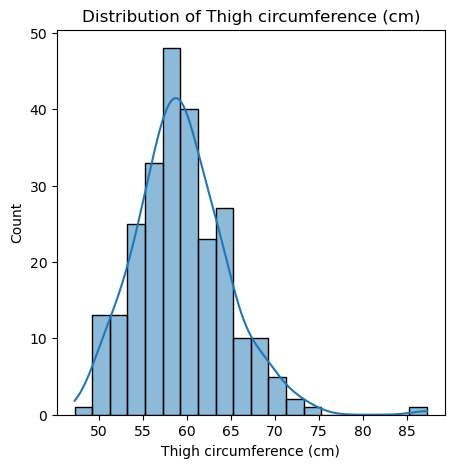

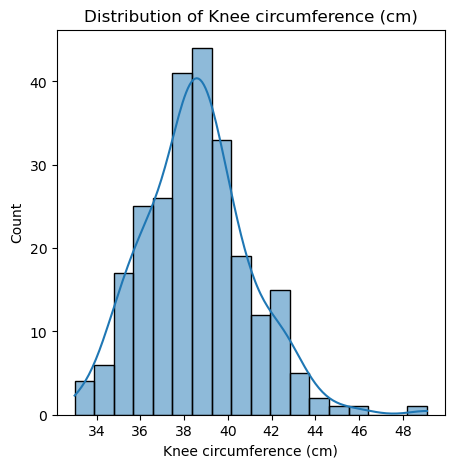

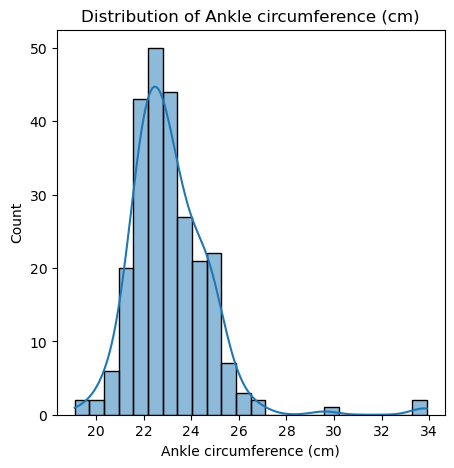

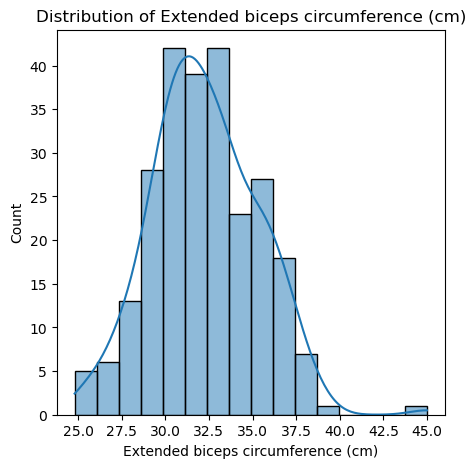

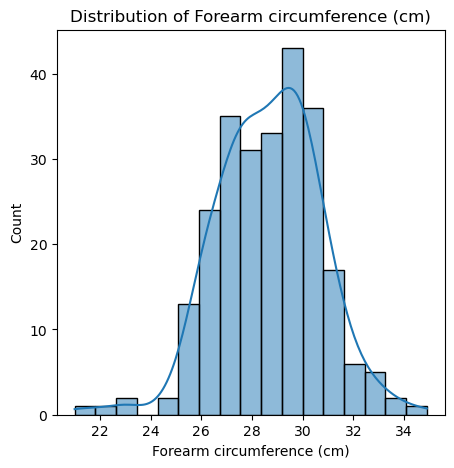

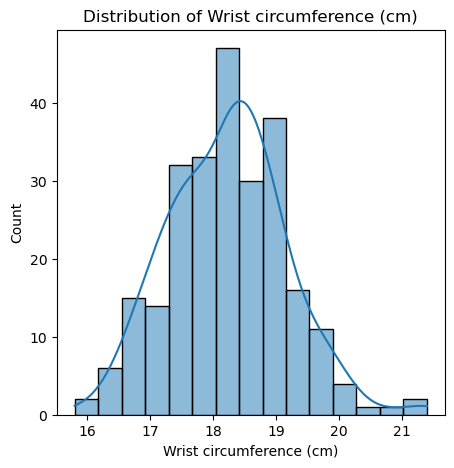

In [18]:
for feature in numerical_feat:
    plt.figure(figsize=(5, 5))
    sns.histplot(x=feature, data=df, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [19]:
features_to_check = train_data.loc[:, [target] + numerical_feat]

In [20]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

features_to_check.corr(numeric_only=True).style.applymap(color_map)

,Percent body fat using Siri equation 495/Density,Density gm/cm^3,Age,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Extended biceps circumference (cm),Forearm circumference (cm),Wrist circumference (cm)
Percent body fat using Siri equation 495/Density,1.000000,-0.985894,0.290705,0.638036,-0.093443,0.759184,-0.006462,0.517152,0.712159,0.831492,0.650805,0.560137,0.504759,0.306626,0.515445,0.377965,0.369046
Density gm/cm^3,-0.985894,1.000000,-0.274309,-0.615886,0.102799,-0.744278,0.022973,-0.496077,-0.688427,-0.814688,-0.632005,-0.552753,-0.489216,-0.305234,-0.507310,-0.366107,-0.344098
Age,0.290705,-0.274309,1.000000,-0.025582,-0.170607,0.122951,-0.268004,0.101012,0.180569,0.226681,-0.060425,-0.222490,0.017355,-0.063025,-0.058316,-0.106092,0.212025
Weight (lbs),0.638036,-0.615886,-0.025582,1.000000,0.296816,0.868696,0.756303,0.803464,0.895265,0.881925,0.934147,0.854059,0.840634,0.627578,0.793921,0.692103,0.728487
Height (inches),-0.093443,0.102799,-0.170607,0.296816,1.000000,-0.050794,0.487326,0.237257,0.116856,0.067321,0.150688,0.135038,0.272116,0.249248,0.210687,0.236495,0.321139
Adiposity index = Weight/Height^2 (kg/m^2),0.759184,-0.744278,0.122951,0.868696,-0.050794,1.000000,0.473151,0.757315,0.917648,0.926217,0.864095,0.780344,0.673081,0.504678,0.720602,0.609293,0.618097
"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",-0.006462,0.022973,-0.268004,0.756303,0.487326,0.473151,1.000000,0.614512,0.554870,0.439809,0.660673,0.642708,0.676394,0.565320,0.607399,0.593105,0.646841
Neck circumference (cm),0.517152,-0.496077,0.101012,0.803464,0.237257,0.757315,0.614512,1.000000,0.779460,0.736493,0.699682,0.665856,0.632395,0.457746,0.711359,0.685107,0.722597
Chest circumference (cm),0.712159,-0.688427,0.180569,0.895265,0.116856,0.917648,0.554870,0.779460,1.000000,0.916974,0.831901,0.707080,0.693005,0.483527,0.712061,0.611394,0.654766
Abdomen circumference (cm),0.831492,-0.814688,0.226681,0.881925,0.067321,0.926217,0.439809,0.736493,0.916974,1.000000,0.867458,0.742790,0.713066,0.465902,0.676457,0.542411,0.619259


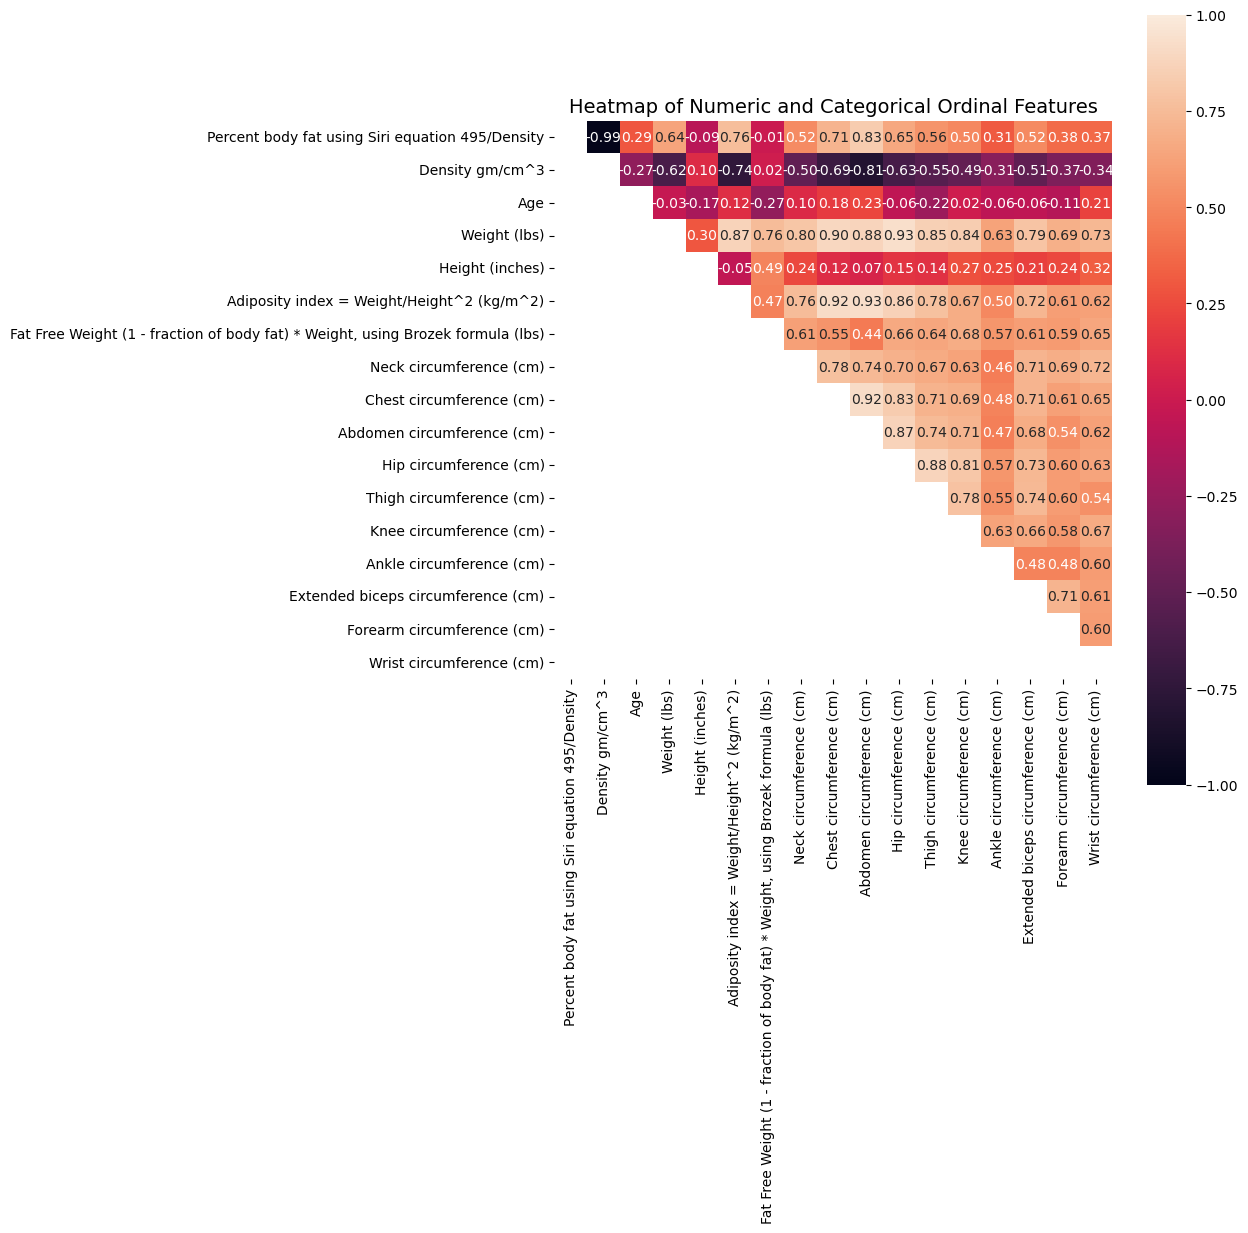

In [21]:
mask = np.tril(np.ones_like(features_to_check.corr(method='spearman', numeric_only=True), dtype=bool))
plt.figure(figsize=(9, 10))
plt.title('Heatmap of Numeric and Categorical Ordinal Features', fontsize=14)
sns.heatmap(features_to_check.corr(numeric_only=True), annot=True, fmt=".2f", mask = mask, square = True, vmin=-1, vmax=1);

In [22]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
oe = MinMaxScaler()

In [25]:
X_train = pd.DataFrame(data=oe.fit_transform(X=X_train), columns=X_train.columns)

In [26]:
X_train.shape

(201, 16)

In [27]:
X_test = pd.DataFrame(data=oe.transform(X=X_test), columns=X_test.columns)

In [28]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [29]:
np.arange(0.00, 1.0, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [30]:
np.logspace(-6,0,15)

array([1.00000000e-06, 2.68269580e-06, 7.19685673e-06, 1.93069773e-05,
       5.17947468e-05, 1.38949549e-04, 3.72759372e-04, 1.00000000e-03,
       2.68269580e-03, 7.19685673e-03, 1.93069773e-02, 5.17947468e-02,
       1.38949549e-01, 3.72759372e-01, 1.00000000e+00])

In [31]:
np.logspace(base=10,start=-5,stop=-4,num=10)

array([1.00000000e-05, 1.29154967e-05, 1.66810054e-05, 2.15443469e-05,
       2.78255940e-05, 3.59381366e-05, 4.64158883e-05, 5.99484250e-05,
       7.74263683e-05, 1.00000000e-04])

In [32]:
np.arange(0.01, 1.0, 0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [33]:
regression_models = [LinearRegression(),
                     Lasso(),
                    ]

In [34]:
linear_model_parameters = {}
lasso_parameters = {'alpha': np.arange(0.01, 1.0, 0.01)}
param_grid = [linear_model_parameters,
              lasso_parameters
             ]

In [35]:
data = {}
data['estimators'] = []

In [36]:
cv = 10
scoring = 'neg_mean_absolute_error'

In [37]:
for sequence, regressor in enumerate(regression_models):
    rgr = GridSearchCV(estimator=regressor,
                       param_grid=param_grid[sequence],
                       scoring=scoring,
                       cv=cv,
                       n_jobs=-1, 
                       error_score='raise', 
                       verbose=3                  
                      )
    rgr.fit(X_train, y_train)
    data['estimators'].append((regressor.__class__.__name__, rgr))  
    print('regressor:', regressor)
    print('class name:', regressor.__class__.__name__)
    print('rgr:', rgr)
    print()

Fitting 10 folds for each of 1 candidates, totalling 10 fits
regressor: LinearRegression()
class name: LinearRegression
rgr: GridSearchCV(cv=10, error_score='raise', estimator=LinearRegression(),
             n_jobs=-1, param_grid={}, scoring='neg_mean_absolute_error',
             verbose=3)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
regressor: Lasso()
class name: Lasso
rgr: GridSearchCV(cv=10, error_score='raise', estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.

In [38]:
data

{'estimators': [('LinearRegression',
   GridSearchCV(cv=10, error_score='raise', estimator=LinearRegression(),
                n_jobs=-1, param_grid={}, scoring='neg_mean_absolute_error',
                verbose=3)),
  ('Lasso',
   GridSearchCV(cv=10, error_score='raise', estimator=Lasso(), n_jobs=-1,
                param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
          0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
          0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
          0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
          0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
          0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
          0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
          0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
          0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.9

In [39]:
NAME = 0
GRID_CV = 1

In [40]:
for estimator in data['estimators']:
    print(f'Best Score for {estimator[NAME]}: {estimator[GRID_CV].best_score_}')
    print(f'Best Hyperparameters for {estimator[NAME]}: {estimator[GRID_CV].best_params_}')
    print("\n")    

Best Score for LinearRegression: -0.6874635648732501
Best Hyperparameters for LinearRegression: {}


Best Score for Lasso: -0.5501049856747982
Best Hyperparameters for Lasso: {'alpha': 0.01}




In [41]:
LASSO = 1

In [42]:
pd.DataFrame(data['estimators'][LASSO][GRID_CV].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006493,0.003894,0.003437,0.001762,0.01,{'alpha': 0.01},-0.493087,-0.597007,-0.989116,-0.441835,-0.468612,-0.689247,-0.576282,-0.541813,-0.395514,-0.308538,-0.550105,0.178581,1
1,0.003303,0.000414,0.002099,0.000390,0.02,{'alpha': 0.02},-0.424845,-0.737853,-1.034974,-0.483382,-0.437032,-0.802394,-0.501346,-0.536888,-0.547649,-0.323411,-0.582977,0.202501,2
2,0.003989,0.003227,0.003963,0.005744,0.03,{'alpha': 0.03},-0.534916,-0.820436,-1.065137,-0.547164,-0.483765,-0.865368,-0.467035,-0.577170,-0.679697,-0.388860,-0.642955,0.201639,3
3,0.002923,0.000415,0.002542,0.001201,0.04,{'alpha': 0.04},-0.535364,-0.851489,-1.107613,-0.534300,-0.488800,-0.904393,-0.502709,-0.600316,-0.731526,-0.411844,-0.666835,0.212586,4
4,0.004032,0.002602,0.002468,0.001390,0.05,{'alpha': 0.05},-0.536646,-0.885610,-1.150073,-0.530685,-0.514608,-0.964114,-0.557989,-0.632824,-0.789438,-0.434972,-0.699696,0.223475,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.002766,0.000552,0.002227,0.000942,0.95,{'alpha': 0.9500000000000001},-4.745214,-5.040295,-5.020414,-4.215935,-3.695654,-5.259364,-5.467192,-4.920466,-6.348594,-2.701827,-4.741495,0.954304,95
95,0.004362,0.003106,0.002797,0.001471,0.96,{'alpha': 0.9600000000000001},-4.792617,-5.089527,-5.063657,-4.261147,-3.732664,-5.306310,-5.522094,-4.970210,-6.412039,-2.729390,-4.787965,0.963034,96
96,0.005233,0.002762,0.003358,0.001516,0.97,{'alpha': 0.97},-4.840021,-5.138759,-5.106901,-4.306358,-3.769674,-5.353255,-5.576997,-5.019954,-6.475484,-2.756952,-4.834435,0.971773,97
97,0.003668,0.001405,0.002048,0.000672,0.98,{'alpha': 0.98},-4.887424,-5.187991,-5.150144,-4.351569,-3.806684,-5.400201,-5.631900,-5.069698,-6.538928,-2.784514,-4.880905,0.980519,98


In [43]:
for estimator in data['estimators']:
    y_pred = estimator[GRID_CV].predict(X_test)
    print(f"R^2 for {estimator[NAME]}: {r2_score(y_test, y_pred)}")
    print(f"MAE {estimator[NAME]}: {mean_absolute_error(y_test,y_pred)}")
    print(f"RMSE {estimator[NAME]}: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print("\n")

R^2 for LinearRegression: 0.982391094440233
MAE LinearRegression: 0.5281691193469021
RMSE LinearRegression: 0.9050592803671644


R^2 for Lasso: 0.9867757920537105
MAE Lasso: 0.4205336084480966
RMSE Lasso: 0.7843243146710125




In [44]:
import matplotlib.pyplot as plt
from textwrap import wrap

In [45]:
data['estimators'][LASSO][GRID_CV].best_estimator_.coef_

array([-34.52443401,   0.7009495 ,  17.9729221 ,   0.        ,
         0.        , -13.76714335,   0.14838694,   0.0516248 ,
         1.57508027,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ])

In [46]:
X_train.keys()

Index(['Density gm/cm^3', 'Age', 'Weight (lbs)', 'Height (inches)',
       'Adiposity index = Weight/Height^2 (kg/m^2)',
       'Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)',
       'Neck circumference (cm)', 'Chest circumference (cm)',
       'Abdomen circumference (cm)', 'Hip circumference (cm)',
       'Thigh circumference (cm)', 'Knee circumference (cm)',
       'Ankle circumference (cm)', 'Extended biceps circumference (cm)',
       'Forearm circumference (cm)', 'Wrist circumference (cm)'],
      dtype='object')

In [47]:
importance = data['estimators'][LASSO][GRID_CV].best_estimator_.coef_
# summarize feature importance
for feature, coefficient in zip(X_train.columns, importance):
    print(f'Feature: {feature}, Score: {coefficient:.5f}')

Feature: Density gm/cm^3, Score: -34.52443
Feature: Age, Score: 0.70095
Feature: Weight (lbs), Score: 17.97292
Feature: Height (inches), Score: 0.00000
Feature: Adiposity index = Weight/Height^2 (kg/m^2), Score: 0.00000
Feature: Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs), Score: -13.76714
Feature: Neck circumference (cm), Score: 0.14839
Feature: Chest circumference (cm), Score: 0.05162
Feature: Abdomen circumference (cm), Score: 1.57508
Feature: Hip circumference (cm), Score: 0.00000
Feature: Thigh circumference (cm), Score: 0.00000
Feature: Knee circumference (cm), Score: 0.00000
Feature: Ankle circumference (cm), Score: -0.00000
Feature: Extended biceps circumference (cm), Score: 0.00000
Feature: Forearm circumference (cm), Score: 0.00000
Feature: Wrist circumference (cm), Score: 0.00000


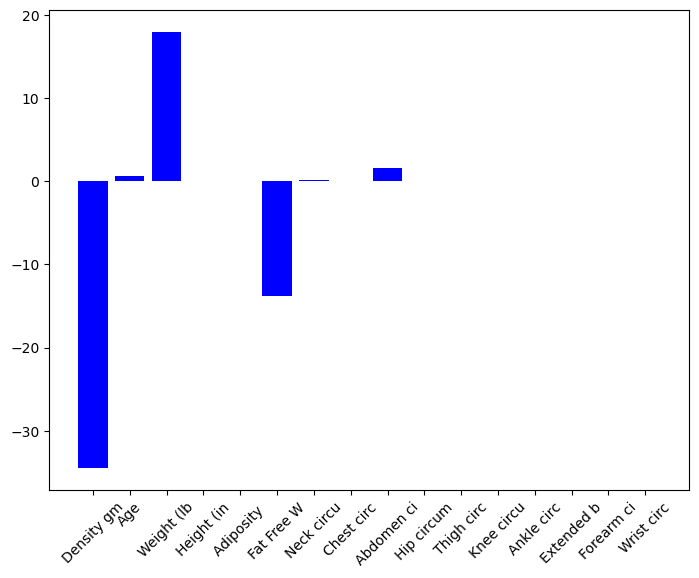

In [48]:
labels =[x[:10] for x in X_train.columns]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([x for x in range(len(importance))], height=importance, color='b')
ax.set_xticks([i for i in range(len(importance))])
ax.set_xticklabels([labels[i] for i in range(len(importance))], rotation=45)
plt.show()

In [49]:
for ind, column in enumerate(X_train.columns):
    if importance[ind] == 0:
        X_train.drop(column, axis=1, inplace=True)
        X_test.drop(column, axis=1, inplace=True)

In [50]:
X_train

,Density gm/cm^3,Age,Weight (lbs),"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm)
0,0.474978,0.288136,0.334489,0.273420,0.460938,0.277551,0.294014
1,0.459175,0.542373,0.551127,0.525054,0.687500,0.577551,0.538732
2,0.227392,0.372881,0.724437,0.464052,0.765625,0.863265,0.783451
3,0.639157,0.491525,0.213172,0.248366,0.289062,0.275510,0.205986
4,0.326602,0.050847,0.610052,0.453159,0.765625,0.644898,0.547535
...,...,...,...,...,...,...,...
196,0.524144,0.355932,0.566724,0.611111,0.585938,0.528571,0.588028
197,0.468832,0.220339,0.480069,0.447712,0.734375,0.448980,0.475352
198,0.741879,0.423729,0.324090,0.481481,0.500000,0.365306,0.241197
199,0.573310,0.288136,0.805893,0.973856,0.914062,0.616327,0.617958


In [51]:
data = {}
data['estimators'] = []

In [52]:
for sequence, regressor in enumerate(regression_models):
    rgr = GridSearchCV(estimator=regressor,
                       param_grid=param_grid[sequence],
                       scoring=scoring,
                       cv=cv,
                       n_jobs=-1, 
                       error_score='raise', 
                       verbose=3                  
                      )
    rgr.fit(X_train, y_train)
    data['estimators'].append((regressor.__class__.__name__, rgr))  

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [53]:
for estimator in data['estimators']:
    print(f'Best Score for {estimator[NAME]}: {estimator[GRID_CV].best_score_}')
    print(f'Best Hyperparameters for {estimator[NAME]}: {estimator[GRID_CV].best_params_}')
    print("\n")    

Best Score for LinearRegression: -0.593886435188495
Best Hyperparameters for LinearRegression: {}


Best Score for Lasso: -0.5504149210059427
Best Hyperparameters for Lasso: {'alpha': 0.01}




In [54]:
for estimator in data['estimators']:
    y_pred = estimator[GRID_CV].predict(X_test)
    print("R^2 for %s: %s" %(estimator[NAME], r2_score(y_test, y_pred)))
    print("MAE %s: %s"%(estimator[NAME], mean_absolute_error(y_test,y_pred)))
    print("RMSE %s: %s"%(estimator[NAME], np.sqrt(mean_squared_error(y_test, y_pred))))
    print("\n")

R^2 for LinearRegression: 0.9727678028089339
MAE LinearRegression: 0.4941292227006445
RMSE LinearRegression: 1.125517327478756


R^2 for Lasso: 0.9867745983722225
MAE Lasso: 0.4205424639870138
RMSE Lasso: 0.7843597123406707




In [56]:
importance = data['estimators'][LASSO][GRID_CV].best_estimator_.coef_
# summarize feature importance
for feature, coefficient in zip(X_train.columns, importance):
    print(f'Feature: {feature}, Score: {coefficient:.5f}')

Feature: Density gm/cm^3, Score: -34.52381
Feature: Age, Score: 0.70098
Feature: Weight (lbs), Score: 17.97406
Feature: Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs), Score: -13.76789
Feature: Neck circumference (cm), Score: 0.14842
Feature: Chest circumference (cm), Score: 0.05141
Feature: Abdomen circumference (cm), Score: 1.57500


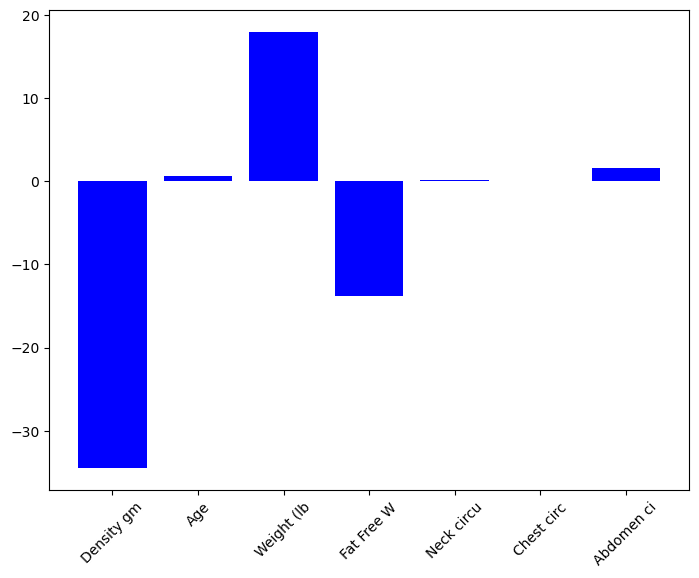

In [57]:
labels =[x[:10] for x in X_train.columns]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([x for x in range(len(importance))], height=importance, color='b')
ax.set_xticks([i for i in range(len(importance))])
ax.set_xticklabels([labels[i] for i in range(len(importance))], rotation=45)
plt.show()

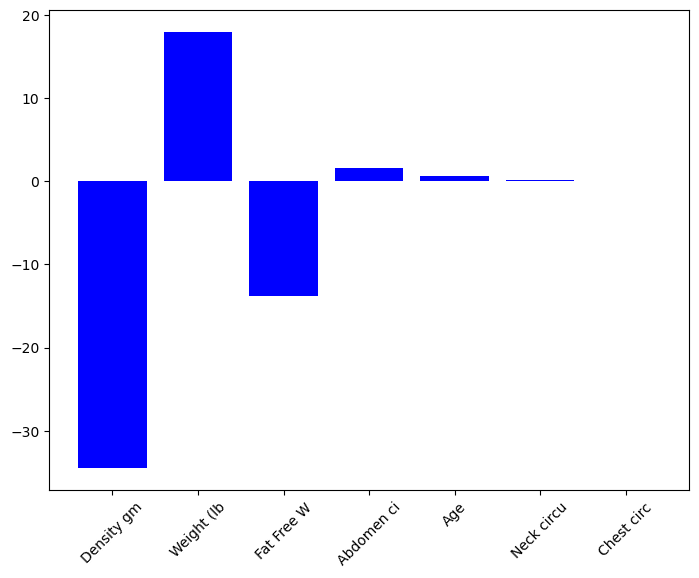

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([x for x in range(len(importance))], height=importance[np.argsort(np.abs(importance))[::-1]], color='b')
ax.set_xticks([i for i in range(len(importance))])
ax.set_xticklabels([labels[i] for i in np.argsort(np.abs(importance))[::-1]], rotation=45)
plt.show()